<a href="https://colab.research.google.com/github/luiscunhacsc/udemy-ia-pt/blob/main/parte1b_visao/parte1b_exemplo02_vgg16_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Célula 1: Introdução

Neste exemplo, vamos aprender como usar modelos pré-treinados para classificação de imagens. Vamos utilizar o conjunto de dados "CIFAR-10", que consiste em 60.000 imagens a cores de 32x32 divididas em 10 classes diferentes.

Começaremos utilizando um modelo pré-treinado diretamente para classificar imagens. Em seguida, vamos realizar o "freezing" e o "fine-tuning" do modelo para adaptá-lo melhor ao nosso conjunto de dados. Por fim, vamos explorar algumas técnicas adicionais, como o "data augmentation" e a regularização.

In [ ]:
# Célula 2: Importação das bibliotecas necessárias
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Célula 3: Carregar o conjunto de dados CIFAR-10

O conjunto de dados CIFAR-10 contém 60.000 imagens a cores de 32x32, divididas em 10 classes, com 6.000 imagens por classe. Existem 50.000 imagens de treino e 10.000 imagens de teste.

In [ ]:
# Célula 4: Carregar o conjunto de dados
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalizar os dados
train_images = train_images / 255.0
test_images = test_images / 255.0

# Converter os rótulos para one-hot encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

170498071/170498071 [==============================] - 13s 0us/step


# Célula 5: Uso de um modelo pré-treinado

Vamos começar usando o modelo VGG16, que é pré-treinado no conjunto de dados ImageNet, para classificar as imagens CIFAR-10. Usaremos o modelo diretamente sem qualquer modificação.

In [ ]:
# Célula 6: Usar o modelo VGG16 pré-treinado
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Adicionar camadas de classificação personalizadas
x = base_model.output
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
predictions = layers.Dense(10, activation='softmax')(x)

# Construir o modelo final
model = Model(inputs=base_model.input, outputs=predictions)

# Compilar o modelo
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Avaliar o desempenho do modelo pré-treinado no conjunto de teste
evaluation = model.evaluate(test_images, test_labels)
print(f"Acurácia do modelo pré-treinado no conjunto de teste: {evaluation[1]}")


58889256/58889256 [==============================] - 3s 0us/step
Epoch 1/5
391/391 [==============================] - 42s 65ms/step - loss: 0.8680 - accuracy: 0.6980 - val_loss: 0.6568 - val_accuracy: 0.7723
Epoch 2/5
391/391 [==============================] - 25s 64ms/step - loss: 0.5084 - accuracy: 0.8238 - val_loss: 0.5382 - val_accuracy: 0.8114
Epoch 3/5
391/391 [==============================] - 23s 59ms/step - loss: 0.3757 - accuracy: 0.8712 - val_loss: 0.4865 - val_accuracy: 0.8355
Epoch 4/5
391/391 [==============================] - 24s 62ms/step - loss: 0.2670 - accuracy: 0.9075 - val_loss: 0.4671 - val_accuracy: 0.8509
Epoch 5/5
391/391 [==============================] - 23s 59ms/step - loss: 0.1860 - accuracy: 0.9353 - val_loss: 0.5151 - val_accuracy: 0.8407


# Célula 7: Fine-tuning do modelo pré-treinado

Agora, vamos realizar o "fine-tuning" do modelo pré-treinado. Inicialmente, vamos congelar todas as camadas do

modelo base (VGG16) e treinar apenas as camadas superiores que adicionamos. Isto é chamado de "feature extraction". Depois, vamos descongelar algumas das camadas do modelo base e realizar um ajuste fino em conjunto com as camadas adicionadas.

In [ ]:
# Célula 8: Feature extraction - congelar as camadas do modelo base
for layer in base_model.layers:
    layer.trainable = False

# Compilar o modelo
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Treinar o modelo
history_feature_extraction = model.fit(train_images, train_labels, batch_size=128, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
391/391 [==============================] - 11s 26ms/step - loss: 0.0899 - accuracy: 0.9707 - val_loss: 0.5348 - val_accuracy: 0.8531
Epoch 2/5
391/391 [==============================] - 8s 21ms/step - loss: 0.0823 - accuracy: 0.9720 - val_loss: 0.5542 - val_accuracy: 0.8539
Epoch 3/5
391/391 [==============================] - 10s 25ms/step - loss: 0.0807 - accuracy: 0.9725 - val_loss: 0.5646 - val_accuracy: 0.8551
Epoch 4/5
391/391 [==============================] - 10s 25ms/step - loss: 0.0793 - accuracy: 0.9730 - val_loss: 0.5675 - val_accuracy: 0.8541
Epoch 5/5
391/391 [==============================] - 8s 21ms/step - loss: 0.0779 - accuracy: 0.9731 - val_loss: 0.5720 - val_accuracy: 0.8553


# Célula 9: Descongelar algumas camadas e realizar ajuste fino

Agora vamos descongelar algumas das camadas do modelo base e realizar o ajuste fino em conjunto com as camadas adicionadas.

In [ ]:
# Célula 10: Descongelar camadas e realizar ajuste fino
for layer in base_model.layers[-4:]:
    layer.trainable = True

# Compilar o modelo
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Treinar o modelo
history_fine_tuning = model.fit(train_images, train_labels, batch_size=128, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
391/391 [==============================] - 15s 34ms/step - loss: 0.0776 - accuracy: 0.9739 - val_loss: 0.5645 - val_accuracy: 0.8578
Epoch 2/5
391/391 [==============================] - 12s 30ms/step - loss: 0.0484 - accuracy: 0.9838 - val_loss: 0.6139 - val_accuracy: 0.8603
Epoch 3/5
391/391 [==============================] - 12s 30ms/step - loss: 0.0342 - accuracy: 0.9889 - val_loss: 0.7132 - val_accuracy: 0.8621
Epoch 4/5
391/391 [==============================] - 12s 30ms/step - loss: 0.0239 - accuracy: 0.9926 - val_loss: 0.7435 - val_accuracy: 0.8599
Epoch 5/5
391/391 [==============================] - 12s 30ms/step - loss: 0.0139 - accuracy: 0.9958 - val_loss: 0.8570 - val_accuracy: 0.8616


# Célula 11: Data Augmentation

O "Data Augmentation" aumenta o tamanho do conjunto de treino através da criação de versões modificadas das imagens, como rotações, deslocamentos e zooms. Isto pode ajudar a melhorar o desempenho e a generalização do modelo.

In [ ]:
# Célula 12: Utilizar Data Augmentation
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.2)
])

inputs = keras.Input(shape=(32, 32, 3))
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)

# Construir o modelo final com Data Augmentation
model_with_augmentation = Model(inputs=inputs, outputs=outputs)

# Compilar o modelo
model_with_augmentation.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Treinar o modelo
history_with_augmentation = model_with_augmentation.fit(train_images, train_labels, batch_size=128, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
391/391 [==============================] - 16s 35ms/step - loss: 0.6589 - accuracy: 0.7806 - val_loss: 0.4875 - val_accuracy: 0.8426
Epoch 2/5
391/391 [==============================] - 12s 31ms/step - loss: 0.5691 - accuracy: 0.8051 - val_loss: 0.5104 - val_accuracy: 0.8387
Epoch 3/5
391/391 [==============================] - 13s 34ms/step - loss: 0.5439 - accuracy: 0.8134 - val_loss: 0.4904 - val_accuracy: 0.8407
Epoch 4/5
391/391 [==============================] - 13s 34ms/step - loss: 0.5205 - accuracy: 0.8188 - val_loss: 0.4568 - val_accuracy: 0.8487
Epoch 5/5
391/391 [==============================] - 13s 34ms/step - loss: 0.5103 - accuracy: 0.8231 - val_loss: 0.4938 - val_accuracy: 0.8420


# Célula 13: Visualizar os resultados

Vamos agora visualizar o desempenho dos modelos em diferentes fases: uso direto do modelo pré-treinado, após "feature extraction", após ajuste fino e após "data augmentation".

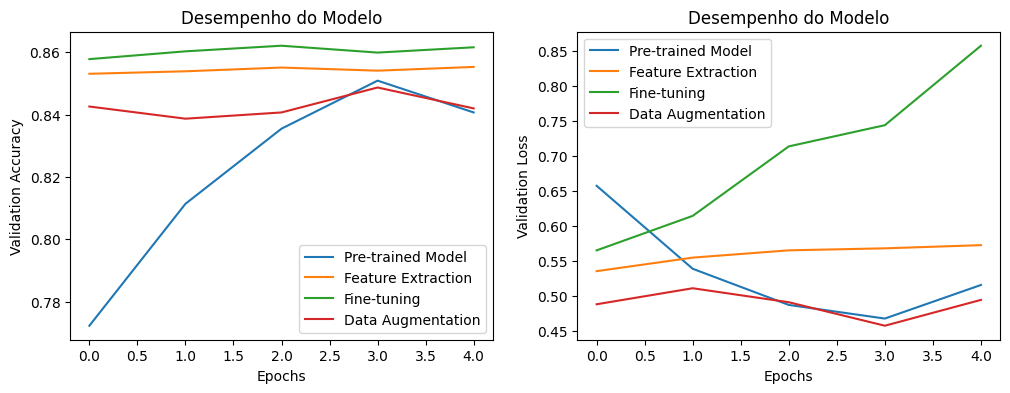

In [ ]:
# Célula 14: Visualização dos resultados
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_feature_extraction.history['val_accuracy'], label='Feature Extraction')
plt.plot(history_fine_tuning.history['val_accuracy'], label='Fine-tuning')


plt.plot(history_with_augmentation.history['val_accuracy'], label='Data Augmentation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Desempenho do Modelo')

plt.subplot(1, 2, 2)
plt.plot(history_feature_extraction.history['val_loss'], label='Feature Extraction')
plt.plot(history_fine_tuning.history['val_loss'], label='Fine-tuning')
plt.plot(history_with_augmentation.history['val_loss'], label='Data Augmentation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Desempenho do Modelo')

plt.show()

# Célula 15: Conclusão

Neste exemplo, explorámos diferentes técnicas para aproveitar os modelos pré-treinados para classificação de imagens. Utilizámos o conjunto de dados CIFAR-10 e o modelo VGG16 pré-treinado.

Começámos utilizando o modelo diretamente, depois fizemos "feature extraction", seguido de ajuste fino e, finalmente, utilizámos "data augmentation".

É importante notar que escolher as melhores técnicas e hiperparâmetros pode depender do conjunto de dados e do problema específico. Experimentar e avaliar diferentes abordagens é uma parte importante do processo de desenvolvimento de modelos de deep learning.